## Project Stage - II (Data Modeling)


### Goals

The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be graphically comparing how different states are doing with respect to opioid mortality rate. And you will be also analysing county based information for different states in the US.

Dataset:

We are going to use historical dataset here for opioid related mortality from 1999 -2019 for different causes of death. Extracted from:
https://wonder.cdc.gov/wonder/help/ucd.html#Drug/Alcohol%20Induced%20Causes

File: ./data/1999-2020_Drug_Overdose_By_Category.csv

* T1.1 Import the historical data from: ./data/1999-2020_Drug_Overdose_By_Category.xls (10 pts)

In [1]:
import pandas as pd
src=pd.read_csv("../data/1999-2020_Drug_Overdose_By_Category.csv")
src.head()

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,1999-2000.txt,NaN,"Jefferson County, AL",1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8
1,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5
2,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable
3,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0
4,1999-2000.txt,NaN,"Mobile County, AL",1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0


In [2]:
src=src.fillna(0)

##### T.1.1.1 Normalize the mortality by population

* Here we normalise the deaths per 100,000.

In [3]:
src["Norm_Deaths"] = round((src["Deaths"]/src["Population"])*100000)
src.head()

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths
0,1999-2000.txt,0.0,"Jefferson County, AL",1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0
1,1999-2000.txt,0.0,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0
2,1999-2000.txt,0.0,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0
3,1999-2000.txt,0.0,"Jefferson County, AL",1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0
4,1999-2000.txt,0.0,"Mobile County, AL",1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0


###### Calculate mean for states and then mean for US per year

* The states are abreviated in the column county, which first needs to be split as a new column.
* Then to calculate the mean for states we groupby states.

In [4]:
newdf=src["County"].str.split(",", n = 1, expand = True)
src['State']=newdf[1]
src['County Name']=newdf[0]
src.drop(columns =["County"], inplace = True)
src.head()

,Table Names,Notes,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State,County Name
0,1999-2000.txt,0.0,1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0,AL,Jefferson County
1,1999-2000.txt,0.0,1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0,AL,Jefferson County
2,1999-2000.txt,0.0,1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0,AL,Jefferson County
3,1999-2000.txt,0.0,1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0,AL,Jefferson County
4,1999-2000.txt,0.0,1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0,AL,Mobile County


* Once we split the state name into a seperate column, we then groupby the state to calculate mean rate of normalised deaths for
states.

In [5]:
#displaying mean deaths across each state
statedf=src.groupby(['State']).mean() #calculates the mean of all the columns
statedf=statedf[['Norm_Deaths']] # since we only want the mortality rate, we will only consider Norm_death column
statedf

,Norm_Deaths
State,
AK,inf
AL,875.530312
AR,1046.926143
AZ,307.579247
CA,269.309476
CO,523.740741
CT,257.225806
DC,171.618557
DE,312.692737


* <b>From the above generated results we can see the mean of deaths across all 50 states.</b>
* Also, we can see that for state AK there is an infinity value, so now we go ahead and check if the dataframe consists of infinity value or is the mean infinite.


In [6]:
#checking for infity value
import numpy as np
srcd=src['Norm_Deaths']
r=np.isfinite(srcd)
r[~r] # ~r is used to display the false values-which indicates that there are some infinity values in the dataframe

1219    False
Name: Norm_Deaths, dtype: bool

* From the above generated result we can see there is some infinity value at index 1219.
* We check by displaying the entire row and then drop this column.

In [7]:
#displaying the column that needs to be dropped to check what is giving inf value as the result
dropcol=src.iloc[1219]
dropcol

Table Names                                                    2017-2020.txt
Notes                                                                    0.0
County Code                                                             2261
Year                                                                    2020
Year Code                                                               2020
Drug/Alcohol Induced Cause         All other non-drug and non-alcohol causes
Drug/Alcohol Induced Cause Code                                           O9
Deaths                                                                    54
Population                                                                 0
Crude Rate                                                               0.0
Norm_Deaths                                                              inf
State                                                                     AK
County Name                                       Valdez-Cordova Census Area

* We can see that the population column contains 0 values, so when we Normalise the population(which divides the deaths by population) we get inf value for the Norm_deaths column, so we need to drop it.

In [8]:
src=src.drop([1219])
src

,Table Names,Notes,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State,County Name
0,1999-2000.txt,0.0,1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0,AL,Jefferson County
1,1999-2000.txt,0.0,1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0,AL,Jefferson County
2,1999-2000.txt,0.0,1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0,AL,Jefferson County
3,1999-2000.txt,0.0,1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0,AL,Jefferson County
4,1999-2000.txt,0.0,1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0,AL,Mobile County
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,0.0,56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5,1082.0,WY,Washakie County
90903,2005-2009.txt,0.0,56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7,1077.0,WY,Weston County
90904,2005-2009.txt,0.0,56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1,1042.0,WY,Weston County
90905,2005-2009.txt,0.0,56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3,1123.0,WY,Weston County


In [9]:
#now we calculate the mean again 
#displaying mean deaths across each state
statedf_final=src.groupby(['State'],as_index=False).mean() #calculates the mean of all the columns
statedf_final=statedf_final[['State','Norm_Deaths']] # since we only want the mortality rate, we will only consider Norm_death column
statedf_final

,State,Norm_Deaths
0,AK,468.255537
1,AL,875.530312
2,AR,1046.926143
3,AZ,307.579247
4,CA,269.309476
5,CO,523.740741
6,CT,257.225806
7,DC,171.618557
8,DE,312.692737
9,FL,427.895559


* After we drop the infinity value, we can see that the statedf now contains the mean death values across all the 50 states.

##### Next, we calculate the mean for US per year

* Here,we groupby both the year and the State, because it is important to understand,how the mortality rate varied accross different states for different years.

In [10]:
yeardf=src.groupby(['Year','State'],as_index=False).mean()
yeardf=yeardf[['Year','State','Norm_Deaths']]
yeardf

,Year,State,Norm_Deaths
0,1999,AK,5.000000
1,1999,AL,4.500000
2,1999,AZ,3.857143
3,1999,CA,5.666667
4,1999,CO,4.750000
...,...,...,...
1098,2020,VT,597.720000
1099,2020,WA,403.531250
1100,2020,WI,661.876923
1101,2020,WV,874.806452


* The above dataframe displays the data for each year. 
* Norm_Deaths column displays the mean death rate across each state.

### Plot a line graph

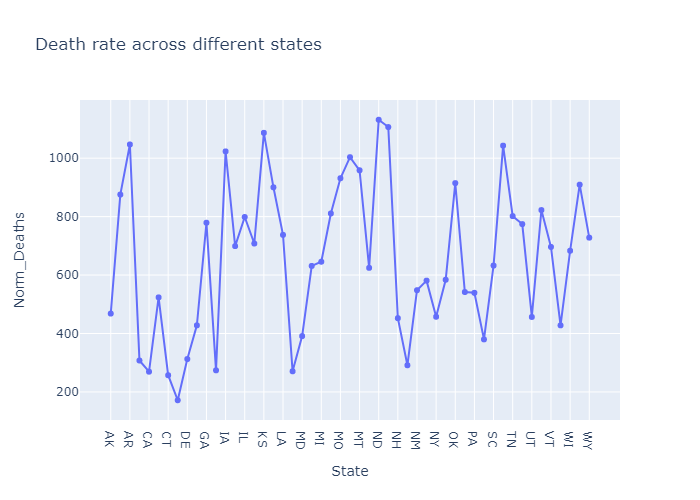

In [11]:
import plotly.express as px
fig=px.line(statedf_final,x=statedf_final['State'],y=statedf_final['Norm_Deaths'],markers=True,title="Death rate across different states")
fig.show("png")

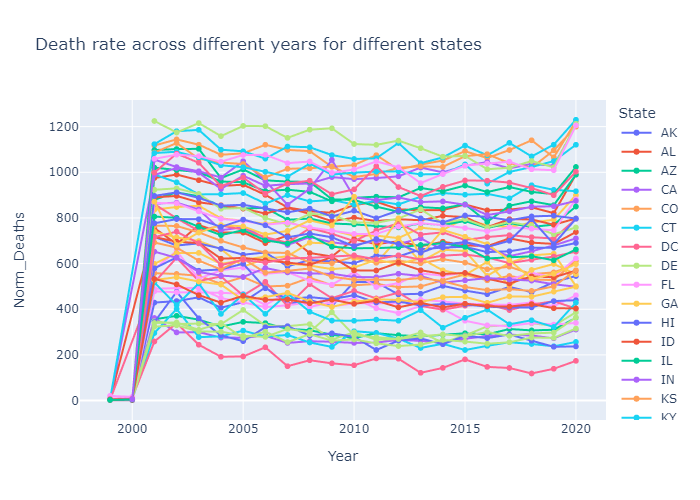

In [12]:
import plotly.express as px
fig=px.line(yeardf, x=yeardf['Year'],y=yeardf['Norm_Deaths'],color=yeardf['State'],
            markers=True,title="Death rate across different years for different states")
fig.show("png")

#### Discuss why there was a peak
* From both the plots, we can see that the peaks are not same.
** In plot-1 the highest mortality rate is across state ND and the mean death rate is 1131.521. 
** In plot-2 the highest mortality rate is across state NE with a mean death rate is 1230.202 for year 2020.
** However, we hypothesise that the moratlity rates across each of the states maybe influenced by the population and hence as the population increases so does the mortality rate inceases.
** Also,we can observe form the graph that the opiod mortality rate is significantly fluctuating, there was a sudden fall in early 2000's and then a sudden raise.And in year 2020, the mortality rated were the highest amogst all the years for most of the states.
** The peaks could have also been due to opiod dispensing rate.

#### Research based on Google:
* In 2020, 91,799 drug overdose deaths occurred in the United States. The age-adjusted rate of overdose deaths increased by 31% from 2019 (21.6 per 100,000) to 2020 (28.3 per 100,000).
* Opioids—mainly synthetic opioids (other than methadone)—are currently the main driver of drug overdose deaths. 82.3% of opioid-involved overdose deaths involved synthetic opioids.
* Opioids were involved in 68,630 overdose deaths in 2020 (74.8% of all drug overdose deaths).Drug overdose deaths involving psychostimulants such as methamphetamine are increasing with and without synthetic opioid involvement.

* <b>From, both google and obtained results we can see that the opiod mortality rate spiked the most in the year 2020 due to drug overdose, which is propotional to the population growth.

References:
* https://www.geeksforgeeks.org/check-if-dataframe-contains-infinity-in-python-pandas/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html